In [2]:
import json
import requests
from census import Census
from us import states
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
c = Census("cb3da972a3410fea907ff2284991388d72455cad")

In [3]:
years = [2011, 2012, 2013, 2014]
zips = ['92104', '92131', '92117', '92037', '92109', '92118', '92108', '92114', '91950', '91932']
area_names = ['North Park', 'Scripps Ranch', 'Clairemont', 'La Jolla', 'Pacific Beach', 'Coronado',
             'Mission Valley', 'Encinitas', 'National City', 'Imperial Beach']
#92104 - North Park
#92131 - Scripps Ranch
#92117 - Clairemont
#92037 - La Jolla
#92109 - Pacific Beach
#92118 - Coronado
#92108 - Mission Valley
#92114 - Encinitas
#91950 - National City
#91932 - Imperial Beach

In [3]:

count = 0
for z in zips:
    
    #grab data
    data = c.acs.zipcode(('NAME','B25013_003E', 'B25013_004E','B25013_005E','B25013_006E','B25013_008E','B25013_009E','B25013_010E',
                      'B25013_011E'), z, year=2016)
        
    temp_df = pd.DataFrame(data)
    #when count = 0 create initial housing_df dataframe
    if count == 0:
            
        housing_df = pd.DataFrame(temp_df)
    #when count > 0 append new data to housing_df dataframe    
    if count > 0:
            
        housing_df = housing_df.append(temp_df)
            
    count +=1
        
        
        

In [4]:
housing_df = housing_df.rename(columns={'B25013_003E': 'Owner - No High School', 'B25013_004E': 'Owner - High School',
                                        'B25013_005E': 'Owner - Some College or Associates Deg', 'B25013_006E': 'Owner - Bachelors',
                                       'B25013_008E': 'Renter - No High School', 'B25013_009E': 'Renter - High School',
                                        'B25013_010E': 'Renter - Some College or Associates Deg', 'B25013_011E': 'Renter - Bachelors',
                                        'zip code tabulation area': 'Zip Code'
                                       })

In [5]:
del housing_df['NAME']

In [7]:
housing_df = housing_df.set_index('Zip Code')

In [8]:
housing_df

,Owner - No High School,Owner - High School,Owner - Some College or Associates Deg,Owner - Bachelors,Renter - No High School,Renter - High School,Renter - Some College or Associates Deg,Renter - Bachelors
Zip Code,,,,,,,,
92104,255.0,627.0,1374.0,3888.0,1715.0,2022.0,5118.0,6148.0
92131,167.0,407.0,1469.0,6978.0,61.0,173.0,790.0,1568.0
92117,705.0,1558.0,4240.0,5780.0,891.0,1213.0,3066.0,3235.0
92037,124.0,348.0,1467.0,7536.0,32.0,293.0,1477.0,5541.0
92109,168.0,443.0,1109.0,4858.0,353.0,1392.0,4426.0,9888.0
92118,94.0,395.0,838.0,3075.0,65.0,303.0,1532.0,2684.0
92108,48.0,216.0,837.0,1700.0,93.0,702.0,2664.0,4180.0
92114,2043.0,2435.0,4712.0,2523.0,1893.0,1502.0,2041.0,556.0
91950,1135.0,1234.0,1977.0,1060.0,3400.0,2655.0,3505.0,1238.0


In [ ]:
#B08137_004E - Car, truck, or van - drove alone
#B08137_007E - Car, truck, or van - carpooled:
#B08137_010E - Public transportation (excluding taxicab)
#B08137_013E - Walked:
#B08137_016E - Taxicab, motorcycle, bicycle, or other means:

In [11]:
count = 0
for z in zips:
        
    data = c.acs.zipcode(('NAME', 'B08137_004E', 'B08137_007E', 'B08137_010E', 'B08137_013E',
                             'B08137_016E'), z, year=2016)
        
    temp_df = pd.DataFrame(data)
    
    if count == 0:
            
        transport_df = pd.DataFrame(temp_df)
            
    if count > 0:
            
        transport_df = transport_df.append(temp_df)
            
    count +=1

In [12]:
transport_df.rename(columns={'B08137_004E': 'Car/Truck/Van - Drove Alone', 'B08137_007E': 'Car/Truck/Van - Carpooled',
                            'B08137_010E': 'Public Transportation', 'B08137_013E': 'Walked',
                             'B08137_016E': 'Taxi/Motorcycle/Bicycle/Other', 'zip code tabulation area': 'Zip Code'
                            }, inplace=True)

In [13]:
del transport_df['NAME']

transport_df = transport_df.set_index('Zip Code')

In [14]:
transport_df

,Car/Truck/Van - Drove Alone,Car/Truck/Van - Carpooled,Public Transportation,Walked,Taxi/Motorcycle/Bicycle/Other
Zip Code,,,,,
92104,20740.0,2195.0,1169.0,676.0,880.0
92131,13614.0,1182.0,122.0,57.0,132.0
92117,22445.0,2645.0,801.0,362.0,379.0
92037,12106.0,1095.0,839.0,870.0,905.0
92109,25024.0,1491.0,852.0,923.0,1150.0
92118,6459.0,427.0,162.0,429.0,861.0
92108,9845.0,903.0,506.0,187.0,342.0
92114,21885.0,3489.0,1511.0,315.0,429.0
91950,17559.0,3953.0,1814.0,622.0,292.0


In [21]:
#Travel Time to Work

#B08303_002E Less than 5 minutes
#B08303_003E	5 to 9 minutes
#B08303_004E 10 to 14 minutes
#B08303_005E 15 to 19 minutes
#B08303_006E 20 to 24 minutes
#B08303_007E	25 to 29 minutes
#B08303_008E	30 to 34 minutes
#B08303_009E	35 to 39 minutes
#B08303_010E	40 to 44 minutes
#B08303_011E	45 to 59 minutes
#B08303_012E	60 to 89 minutes
#B08303_013E	90 or more minutes

In [16]:
count = 0
for z in zips:
        
    data = c.acs.zipcode(('NAME', 'B08303_002E', 'B08303_003E', 'B08303_004E', 'B08303_005E', 'B08303_006E',
                             'B08303_007E', 'B08303_008E', 'B08303_009E', 'B08303_010E',
                             'B08303_011E', 'B08303_012E', 'B08303_013E'), z, year=2016)
        
    temp_df = pd.DataFrame(data)
        
    if count == 0:
            
        commute_df = pd.DataFrame(temp_df)
            
    if count > 0:
            
        commute_df = commute_df.append(temp_df)
            
    count +=1

In [17]:
commute_df.rename(columns={'B08303_002E': '<5', 'B08303_003E': '5-9', 'B08303_004E': '10-14', 'B08303_005E': '15-19',
                           'B08303_006E': '20-24','B08303_007E': '25-29', 'B08303_008E': '30-34', 'B08303_009E': '35-39',
                           'B08303_010E': '40-44', 'B08303_011E': '45-59', 'B08303_012E': '60-89', 'B08303_013E': '>90',
                          'zip code tabulation area': 'Zip Code'
                          }, inplace=True)

In [18]:
del commute_df['NAME']

In [46]:
#commute_df['Zip Code'] = commute_df.index.values

In [19]:
commute_df = commute_df.set_index('Zip Code')

In [20]:
for colname in commute_df.columns:
    commute_df[colname] = commute_df[colname].astype(float)

In [21]:
commute_df

,<5,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-59,60-89,>90
Zip Code,,,,,,,,,,,,
92104,166.0,1340.0,4636.0,5608.0,4617.0,1988.0,3456.0,780.0,782.0,1004.0,911.0,382.0
92131,65.0,620.0,1310.0,2320.0,4021.0,2148.0,2887.0,429.0,394.0,597.0,192.0,147.0
92117,414.0,1611.0,4417.0,6435.0,7463.0,1846.0,2345.0,286.0,389.0,732.0,430.0,274.0
92037,429.0,1521.0,2479.0,2657.0,3814.0,892.0,2346.0,371.0,252.0,429.0,245.0,392.0
92109,474.0,2555.0,3082.0,5806.0,6788.0,2277.0,4614.0,846.0,913.0,1284.0,610.0,218.0
92118,475.0,1629.0,1528.0,1536.0,1717.0,411.0,915.0,182.0,103.0,206.0,256.0,177.0
92108,274.0,1113.0,1755.0,2434.0,2589.0,731.0,1594.0,230.0,312.0,220.0,366.0,165.0
92114,228.0,711.0,1886.0,3882.0,6165.0,2956.0,6006.0,696.0,1511.0,1902.0,1297.0,504.0
91950,347.0,1259.0,2570.0,4750.0,4977.0,2022.0,4641.0,980.0,1047.0,1489.0,1337.0,597.0


In [55]:
commute_med_num = []
commute_l = commute_df.sum(axis=1).tolist()

x= 0
bracket = []
for value in commute_l:
    
    commute_med_num.append(value / 2)
    
commute_med_num

for index, row in commute_df.iterrows():
    count=0
    for colname in commute_df.columns:
        
        if count <= commute_med_num[x]:
            
            count += row[colname]
            
        elif count > commute_med_num[x]:
            
            bracket.append(colname)
            
            break
    x += 1
bracket

['25-29',
 '25-29',
 '25-29',
 '25-29',
 '25-29',
 '20-24',
 '25-29',
 '30-34',
 '25-29',
 '25-29']

In [54]:
commute_med_num

[12835.0,
 7565.0,
 13321.0,
 7913.5,
 14733.5,
 4567.5,
 5891.5,
 13872.0,
 13008.0,
 5568.0]

In [49]:
commute_df

,<5,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-59,60-89,>90
Zip Code,,,,,,,,,,,,
92104,166.0,1340.0,4636.0,5608.0,4617.0,1988.0,3456.0,780.0,782.0,1004.0,911.0,382.0
92131,65.0,620.0,1310.0,2320.0,4021.0,2148.0,2887.0,429.0,394.0,597.0,192.0,147.0
92117,414.0,1611.0,4417.0,6435.0,7463.0,1846.0,2345.0,286.0,389.0,732.0,430.0,274.0
92037,429.0,1521.0,2479.0,2657.0,3814.0,892.0,2346.0,371.0,252.0,429.0,245.0,392.0
92109,474.0,2555.0,3082.0,5806.0,6788.0,2277.0,4614.0,846.0,913.0,1284.0,610.0,218.0
92118,475.0,1629.0,1528.0,1536.0,1717.0,411.0,915.0,182.0,103.0,206.0,256.0,177.0
92108,274.0,1113.0,1755.0,2434.0,2589.0,731.0,1594.0,230.0,312.0,220.0,366.0,165.0
92114,228.0,711.0,1886.0,3882.0,6165.0,2956.0,6006.0,696.0,1511.0,1902.0,1297.0,504.0
91950,347.0,1259.0,2570.0,4750.0,4977.0,2022.0,4641.0,980.0,1047.0,1489.0,1337.0,597.0


In [22]:
count = 0
for z in zips:
    
    data = c.acs.zipcode(('NAME', 'B25087_004E', 'B25087_005E', 'B25087_006E', 'B25087_007E', 'B25087_008E',
                         'B25087_009E', 'B25087_010E', 'B25087_011E', 'B25087_012E', 'B25087_013E', 'B25087_014E',
                         'B25087_015E', 'B25087_016E', 'B25087_017E'), z, year=2016)
    
    if count == 0:
        
        mortgage_df = pd.DataFrame(data)
        
    elif count > 0:
        
        mortgage_df = mortgage_df.append(data)
    
    count += 1

In [23]:
mortgage_df.rename(columns={'B25087_004E': '200-299', 'B25087_005E': '300-399', 'B25087_006E': '400-499',
                            'B25087_007E': '500-599', 'B25087_008E': '600-699', 'B25087_009E': '700-799',
                            'B25087_010E': '800-899', 'B25087_011E': '900-999', 'B25087_012E': '1000-1249',
                            'B25087_013E': '1250-1499', 'B25087_014E': '1500-1999', 'B25087_015E': '2000-2499',
                            'B25087_016E': '2500-2999', 'B25087_017E': '>3000',
                           'zip code tabulation area': 'Zip Code'}, inplace=True)

In [24]:
del mortgage_df['NAME']

In [25]:
mortgage_df = mortgage_df.set_index('Zip Code')

In [56]:
mortgage_df

,200-299,300-399,400-499,500-599,600-699,700-799,800-899,900-999,1000-1249,1250-1499,1500-1999,2000-2499,2500-2999,>3000
Zip Code,,,,,,,,,,,,,,
92104,0.0,6.0,26.0,22.0,65.0,22.0,94.0,49.0,289.0,334.0,965.0,897.0,803.0,441.0
92131,9.0,0.0,0.0,0.0,42.0,71.0,30.0,31.0,154.0,240.0,1012.0,1150.0,1274.0,1116.0
92117,0.0,43.0,77.0,35.0,99.0,99.0,133.0,64.0,633.0,451.0,1553.0,1875.0,1396.0,830.0
92037,0.0,0.0,0.0,14.0,0.0,36.0,24.0,48.0,101.0,63.0,450.0,539.0,659.0,611.0
92109,0.0,5.0,19.0,0.0,42.0,31.0,28.0,64.0,221.0,252.0,668.0,474.0,541.0,359.0
92118,0.0,29.0,0.0,14.0,6.0,32.0,0.0,3.0,26.0,48.0,215.0,332.0,184.0,382.0
92108,0.0,0.0,0.0,12.0,0.0,43.0,99.0,103.0,269.0,181.0,680.0,280.0,258.0,197.0
92114,8.0,23.0,70.0,131.0,102.0,114.0,185.0,152.0,790.0,1084.0,2998.0,2042.0,830.0,276.0
91950,14.0,25.0,36.0,25.0,24.0,46.0,28.0,36.0,458.0,676.0,1241.0,703.0,327.0,101.0


In [57]:
for colname in mortgage_df.columns:
    
    mortgage_df[colname] = mortgage_df[colname].astype(float)

In [59]:
mortgage_med_num = []
mortgage_l = mortgage_df.sum(axis=1).tolist()

x= 0
mortgage_bracket = []
for value in mortgage_l:
    
    mortgage_med_num.append(value / 2)

for index, row in mortgage_df.iterrows():
    count=0
    for colname in mortgage_df.columns:
        
        if count <= mortgage_med_num[x]:
            
            count += row[colname]
            
        elif count > mortgage_med_num[x]:
            
            mortgage_bracket.append(colname)
            
            break
    x += 1
mortgage_bracket

['2500-2999',
 '2500-2999',
 '2500-2999',
 '2500-2999',
 '2500-2999',
 '2500-2999',
 '2000-2499',
 '2000-2499',
 '2000-2499',
 '2000-2499']

In [4]:
count = 0
for z in zips:
    
    data = c.acs.zipcode(('NAME', 'B19001_002E', 'B19001_003E', 'B19001_004E', 'B19001_005E', 'B19001_006E',
                         'B19001_007E', 'B19001_008E', 'B19001_009E', 'B19001_010E', 'B19001_011E',
                         'B19001_012E', 'B19001_013E', 'B19001_014E', 'B19001_015E', 'B19001_016E',
                         'B19001_017E'), z, year=2014)
    
    if count == 0:
        
        income_df = pd.DataFrame(data)
        
    elif count > 0:
        
        income_df = income_df.append(data)
    
    count += 1

In [5]:
income_df.rename(columns={'B19001_002E': '<10,000', 'B19001_003E': '10,000-14,999', 'B19001_004E': '15,000-19,999',
                          'B19001_005E': '20,000-24,999', 'B19001_006E': '25,000-29,999', 'B19001_007E': '30,000-34,999',
                          'B19001_008E': '35,000-39,999', 'B19001_009E': '40,000-44,999', 'B19001_010E': '45,000-49,999',
                          'B19001_011E': '50,000-59,999', 'B19001_012E': '60,000-74,999', 'B19001_013E': '75,000-99,999',
                          'B19001_014E': '100,000-124,999', 'B19001_015E': '125,000-149,999', 'B19001_016E': '150,000-199,999',
                         'B19001_017E': '>200,000', 'zip code tabulation area': 'Zip Code'}, inplace=True)

In [6]:
del income_df['NAME']

In [7]:
income_df = income_df.set_index('Zip Code')

In [8]:
income_df

,"<10,000","10,000-14,999","15,000-19,999","20,000-24,999","25,000-29,999","30,000-34,999","35,000-39,999","40,000-44,999","45,000-49,999","50,000-59,999","60,000-74,999","75,000-99,999","100,000-124,999","125,000-149,999","150,000-199,999",">200,000"
Zip Code,,,,,,,,,,,,,,,,
92104,1486.0,1337.0,998.0,1064.0,1137.0,1060.0,1056.0,1221.0,1249.0,1864.0,2067.0,2100.0,1043.0,924.0,1154.0,925.0
92131,315.0,94.0,142.0,204.0,143.0,255.0,280.0,304.0,227.0,356.0,731.0,1520.0,1411.0,1109.0,1749.0,2626.0
92117,809.0,959.0,709.0,898.0,697.0,762.0,934.0,842.0,904.0,1845.0,2341.0,3011.0,1777.0,1536.0,1359.0,1151.0
92037,1234.0,438.0,528.0,434.0,518.0,453.0,494.0,438.0,351.0,881.0,1289.0,1634.0,1557.0,1049.0,1707.0,3911.0
92109,1711.0,859.0,538.0,824.0,792.0,841.0,611.0,866.0,865.0,1979.0,2158.0,3364.0,2237.0,1203.0,1578.0,1697.0
92118,409.0,176.0,240.0,280.0,253.0,273.0,355.0,323.0,295.0,376.0,840.0,984.0,929.0,732.0,889.0,1492.0
92108,724.0,535.0,228.0,404.0,320.0,433.0,402.0,308.0,234.0,1072.0,1370.0,1612.0,902.0,716.0,617.0,330.0
92114,939.0,888.0,827.0,871.0,1035.0,669.0,888.0,819.0,710.0,1495.0,2001.0,2758.0,1849.0,837.0,655.0,348.0
91950,1284.0,1391.0,1284.0,1228.0,996.0,981.0,829.0,864.0,843.0,1432.0,1339.0,1452.0,871.0,430.0,470.0,168.0


In [9]:
for colname in income_df.columns:
    
    income_df[colname] = income_df[colname].astype(float)

In [12]:
income_med_num = []
income_l = income_df.sum(axis=1).tolist()

x= 0
income_bracket = []
income_scale = []

for value in income_l:
    
    income_med_num.append(value / 2)

for index, row in income_df.iterrows():
    count=0
    y=0
    for colname in income_df.columns:
        
        if count <= income_med_num[x]:
            
            count += row[colname]
            y+=1
        elif count > income_med_num[x]:
            
            income_bracket.append(colname)
            income_scale.append(y)
            
            break
    x += 1
income_bracket

['50,000-59,999',
 '125,000-149,999',
 '75,000-99,999',
 '100,000-124,999',
 '75,000-99,999',
 '100,000-124,999',
 '75,000-99,999',
 '60,000-74,999',
 '40,000-44,999',
 '50,000-59,999']

In [13]:
income_scale

[9, 13, 11, 12, 11, 12, 11, 10, 7, 9]

In [14]:
income_range = np.arange(0, len(income_df.columns))
income_range

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

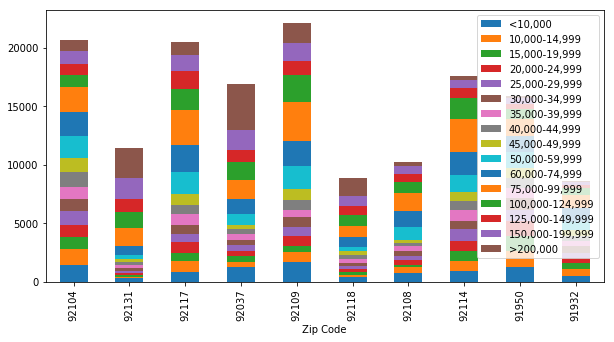

In [20]:
income_df
ax = income_df.plot(kind='bar', figsize=(10,5), stacked=True)
ax.legend(loc='upper right')

In [106]:
income_ls = []

for index, row in income_df.iterrows():
    temp = []
    
    temp.append(row['<10,000'])
    temp.append(row['10,000-14,999'])
    temp.append(row['15,000-19,999'])
    temp.append(row['20,000-24,999'])
    temp.append(row['25,000-29,999'])
    temp.append(row['30,000-34,999'])
    temp.append(row['35,000-39,999'])
    temp.append(row['40,000-44,999'])
    temp.append(row['45,000-49,999'])
    temp.append(row['50,000-59,999'])
    temp.append(row['60,000-74,999'])
    temp.append(row['75,000-99,999'])
    temp.append(row['100,000-124,999'])
    temp.append(row['125,000-149,999'])
    temp.append(row['150,000-199,999'])
    temp.append(row['>200,000'])
    
    income_ls.append(temp)

In [ ]:
income_ls

In [108]:
income_x = ['<10,000', '10,000-14,999', '15,000-19,999', '20,000-24,999', '25,000-29,999', '30,000-34,999',
           '35,000-39,999', '40,000-44,999', '45,000-49,999', '50,000-59,999', '60,000-74,999', '75,000-99,999',
            '100,000-124,999', '125,000-149,999', '150,000-199,999', '>200,000'
           ]

Text(0.5,1,'Number of People by Income Bracket \n 92104')

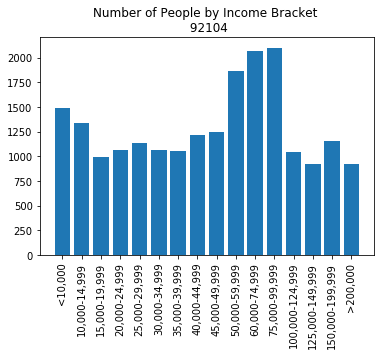

In [114]:
plt.bar(income_x, income_ls[0])
plt.xticks(rotation='vertical')
plt.title(f'Number of People by Income Bracket \n {zips[0]}')

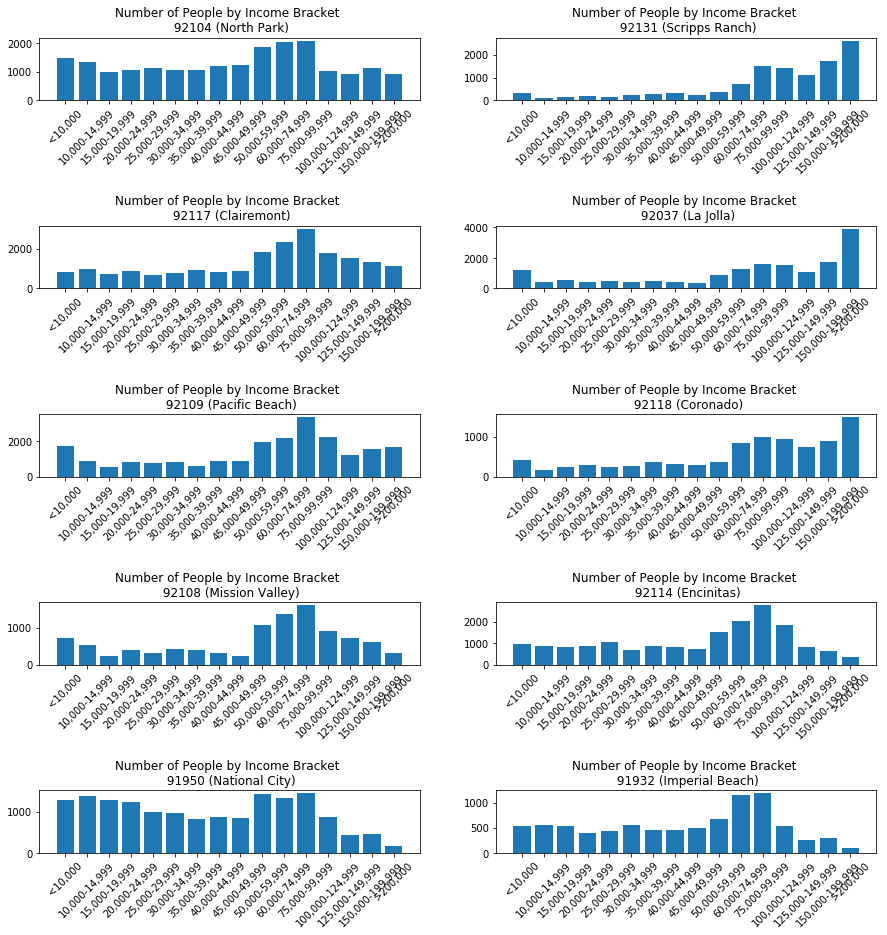

In [124]:
fig = plt.figure()

for x in range(0, len(income_ls)):
    
    fig.add_subplot(5,2,x+1)
    fig.set_figheight(15)
    fig.set_figwidth(15)
    plt.bar(income_x, income_ls[x])
    plt.xticks(rotation='45')
    plt.title(f'Number of People by Income Bracket \n {zips[x]} ({area_names[x]})')

plt.subplots_adjust(hspace=2, wspace=.2)

In [32]:
count = 0
for z in zips:
    
    data = c.acs.zipcode(('NAME', 'B15003_017E', 'B15003_018E', 'B15003_019E', 'B15003_020E', 'B15003_021E',
                         'B15003_022E', 'B15003_023E', 'B15003_024E', 'B15003_025E'), z, year=2014)
    
    if count == 0:
        
        education_df = pd.DataFrame(data)
        
    elif count > 0:
        
        education_df = education_df.append(data)
    
    count += 1

In [33]:
education_df.rename(columns={'B15003_017E': 'High School', 'B15003_018E': 'GED or equivalent', 'B15003_019E': '<1yr College',
                             'B15003_020E': '>=1yr College No Deg', 'B15003_021E': 'Associates Deg',
                         'B15003_022E': 'Bachelors Deg', 'B15003_023E': 'Masters Deg', 'B15003_024E': 'Professional Deg',
                         'B15003_025E': 'PhD', 'zip code tabulation area': 'Zip Code'}, inplace=True)

In [34]:
del education_df['NAME']

In [35]:
education_df = education_df.set_index('Zip Code')

In [63]:
education_df

,High School,GED or equivalent,<1yr College,>=1yr College No Deg,Associates Deg,Bachelors Deg,Masters Deg,Professional Deg,PhD
Zip Code,,,,,,,,,
92104,5052.0,640.0,1702.0,5483.0,2745.0,8492.0,3315.0,1303.0,705.0
92131,1654.0,105.0,752.0,2693.0,1838.0,7598.0,4515.0,1233.0,1014.0
92117,6454.0,630.0,2299.0,7528.0,3057.0,9546.0,3264.0,836.0,1032.0
92037,1500.0,116.0,734.0,2894.0,1065.0,10165.0,5715.0,2932.0,2818.0
92109,3197.0,264.0,1642.0,4728.0,2157.0,14389.0,4479.0,1387.0,787.0
92118,1583.0,84.0,513.0,2578.0,1394.0,4845.0,2861.0,1242.0,539.0
92108,1349.0,119.0,968.0,2624.0,1260.0,4807.0,1679.0,638.0,416.0
92114,10073.0,1325.0,2426.0,9479.0,4089.0,5315.0,938.0,182.0,75.0
91950,9178.0,1038.0,2094.0,6911.0,2581.0,3860.0,569.0,121.0,114.0


In [64]:
for colname in education_df.columns:
    
    education_df[colname] = education_df[colname].astype(float)

In [65]:
education_med_num = []
education_l = education_df.sum(axis=1).tolist()

x= 0
education_bracket = []
for value in education_l:
    
    education_med_num.append(value / 2)

for index, row in education_df.iterrows():
    count=0
    for colname in education_df.columns:
        
        if count <= education_med_num[x]:
            
            count += row[colname]
            
        elif count > education_med_num[x]:
            
            education_bracket.append(colname)
            
            break
    x += 1
education_bracket

['Bachelors Deg',
 'Masters Deg',
 'Bachelors Deg',
 'Masters Deg',
 'Masters Deg',
 'Masters Deg',
 'Masters Deg',
 'Associates Deg',
 'Associates Deg',
 'Associates Deg']

In [39]:
count = 0
for z in zips:
    
    data = c.acs.zipcode(('B25091_002E', 'B25091_003E', 'B25091_004E', 'B25091_005E', 'B25091_006E',
                         'B25091_007E', 'B25091_008E', 'B25091_009E', 'B25091_010E', 'B25091_011E'), z, year=2016)
    
    if count == 0:
        
        mortgage_per_df = pd.DataFrame(data)
        
    elif count > 0:
        
        mortgage_per_df = mortgage_per_df.append(data)
    
    count += 1

In [42]:
mortgage_per_df = mortgage_per_df.rename(columns={'B25091_002E': 'Total', 'B25091_003E': '<10', 'B25091_004E': '10-14',
                                                 'B25091_005E': '15-19', 'B25091_006E': '20-24', 'B25091_007E': '25-29',
                                                 'B25091_008E': '30-34', 'B25091_009E': '35-39', 'B25091_010E': '40-49',
                                                 'B25091_011E': '>50', 'zip code tabulation area': 'Zip Code'})

In [43]:
mortgage_per_df.set_index('Zip Code', inplace=True)

In [68]:
del mortgage_per_df['Total']

In [69]:
mortgage_per_df

,<10,10-14,15-19,20-24,25-29,30-34,35-39,40-49,>50
Zip Code,,,,,,,,,
92104,201.0,475.0,934.0,741.0,527.0,437.0,270.0,465.0,672.0
92131,484.0,816.0,1242.0,1307.0,866.0,682.0,281.0,556.0,1056.0
92117,297.0,837.0,1107.0,1462.0,771.0,731.0,663.0,685.0,1436.0
92037,369.0,555.0,875.0,789.0,623.0,448.0,296.0,666.0,1356.0
92109,174.0,496.0,468.0,657.0,407.0,274.0,273.0,388.0,1044.0
92118,168.0,329.0,274.0,249.0,289.0,193.0,218.0,255.0,670.0
92108,69.0,281.0,279.0,286.0,197.0,232.0,241.0,183.0,540.0
92114,454.0,755.0,1015.0,1351.0,1166.0,853.0,556.0,1042.0,1838.0
91950,135.0,388.0,601.0,476.0,453.0,257.0,235.0,393.0,828.0


In [70]:
for colname in mortgage_per_df.columns:
    
    mortgage_per_df[colname] = mortgage_per_df[colname].astype(float)

In [71]:
mortgage_per_med_num = []
mortgage_per_l = mortgage_per_df.sum(axis=1).tolist()

x= 0
mortgage_per_bracket = []
for value in mortgage_per_l:
    
    mortgage_per_med_num.append(value / 2)

for index, row in mortgage_per_df.iterrows():
    count=0
    for colname in mortgage_per_df.columns:
        
        if count <= mortgage_per_med_num[x]:
            
            count += row[colname]
            
        elif count > mortgage_per_med_num[x]:
            
            mortgage_per_bracket.append(colname)
            
            break
    x += 1
mortgage_per_bracket

['30-34',
 '25-29',
 '30-34',
 '30-34',
 '30-34',
 '35-39',
 '35-39',
 '30-34',
 '30-34',
 '30-34']

In [45]:
count = 0
for z in zips:
    
    data = c.acs.zipcode(('B25070_001E', 'B25070_002E', 'B25070_003E', 'B25070_004E', 'B25070_005E',
                         'B25070_006E', 'B25070_007E', 'B25070_008E', 'B25070_009E', 'B25070_010E'), z, year=2016)
    
    if count == 0:
        
        rent_per_df = pd.DataFrame(data)
        
    elif count > 0:
        
        rent_per_df = rent_per_df.append(data)
    
    count += 1

In [46]:
rent_per_df.rename(columns={'B25070_001E': 'Total', 'B25070_002E': '<10', 'B25070_003E': '10-14',
                                                 'B25070_004E': '15-19', 'B25070_005E': '20-24', 'B25070_006E': '25-29',
                                                 'B25070_007E': '30-34', 'B25070_008E': '35-39', 'B25070_009E': '40-49',
                                                 'B25070_010E': '>50', 'zip code tabulation area': 'Zip Code'}, inplace=True)

In [47]:
rent_per_df.set_index('Zip Code', inplace=True)

In [72]:
del rent_per_df['Total']

In [73]:
rent_per_df

,<10,10-14,15-19,20-24,25-29,30-34,35-39,40-49,>50
Zip Code,,,,,,,,,
92104,150.0,967.0,1801.0,2083.0,1876.0,1571.0,1192.0,1482.0,3242.0
92131,16.0,287.0,343.0,284.0,217.0,335.0,232.0,159.0,633.0
92117,208.0,783.0,797.0,1071.0,1144.0,704.0,585.0,917.0,1819.0
92037,372.0,494.0,699.0,928.0,787.0,529.0,347.0,531.0,2184.0
92109,394.0,1482.0,2185.0,2247.0,1656.0,1744.0,921.0,1186.0,3437.0
92118,136.0,263.0,535.0,340.0,568.0,352.0,348.0,495.0,1253.0
92108,120.0,550.0,968.0,928.0,770.0,668.0,462.0,632.0,2018.0
92114,92.0,264.0,439.0,517.0,571.0,615.0,423.0,744.0,2012.0
91950,206.0,683.0,1037.0,1084.0,923.0,1183.0,924.0,1048.0,3313.0


In [74]:
for colname in rent_per_df.columns:
    
    rent_per_df[colname] = rent_per_df[colname].astype(float)

In [75]:
rent_per_med_num = []
rent_per_l = rent_per_df.sum(axis=1).tolist()

x= 0
rent_per_bracket = []
for value in rent_per_l:
    
    rent_per_med_num.append(value / 2)

for index, row in rent_per_df.iterrows():
    count=0
    for colname in rent_per_df.columns:
        
        if count <= rent_per_med_num[x]:
            
            count += row[colname]
            
        elif count > rent_per_med_num[x]:
            
            rent_per_bracket.append(colname)
            
            break
    x += 1
rent_per_bracket

['35-39',
 '35-39',
 '35-39',
 '35-39',
 '30-34',
 '35-39',
 '35-39',
 '40-49',
 '40-49',
 '35-39']

In [76]:
count = 0
for z in zips:
    
    data = c.acs.zipcode(('C15010_002E', 'C15010_004E', 'C15010_005E', 'C15010_006E'), z, year=2016)
    
    if count == 0:
        
        degree_df = pd.DataFrame(data)
        
    elif count > 0:
        
        degree_df = degree_df.append(data)
    
    count += 1

In [80]:
degree_df.rename(columns={'C15010_002E': 'Science/Engineering', 'C15010_004E': 'Business',
                          'C15010_005E': 'Education', 'C15010_006E': 'Arts/Humanities/Other',
                         'zip code tabulation area': 'Zip Code'}, inplace=True)

In [81]:
degree_df.set_index('Zip Code', inplace=True)

In [82]:
degree_df

,Science/Engineering,Business,Education,Arts/Humanities/Other
Zip Code,,,,
92104,6534.0,2165.0,620.0,5221.0
92131,7588.0,2920.0,797.0,2769.0
92117,7038.0,3073.0,1253.0,3141.0
92037,10695.0,3578.0,1222.0,5015.0
92109,9093.0,4897.0,1203.0,5911.0
92118,4072.0,1724.0,970.0,2297.0
92108,3169.0,1943.0,573.0,1944.0
92114,1964.0,1634.0,862.0,1785.0
91950,1807.0,1170.0,557.0,1294.0


In [83]:
count = 0
for z in zips:
    
    data = c.acs.zipcode(('B01001_003E', 'B01001_004E', 'B01001_005E', 'B01001_006E', 'B01001_007E', 'B01001_008E',
                         'B01001_009E', 'B01001_010E', 'B01001_011E', 'B01001_012E', 'B01001_013E', 'B01001_014E',
                          'B01001_015E', 'B01001_016E', 'B01001_017E', 'B01001_018E', 'B01001_019E', 'B01001_020E',
                          'B01001_021E', 'B01001_022E', 'B01001_023E', 'B01001_024E', 'B01001_025E'
                         ), z, year=2016)
    
    if count == 0:
        
        age_df = pd.DataFrame(data)
        
    elif count > 0:
        
        age_df = age_df.append(data)
    
    count += 1
    
age_df_expanded = age_df

In [85]:
age_df['0-17'] = age_df['B01001_003E'] + age_df['B01001_004E'] + age_df['B01001_005E'] + age_df['B01001_006E']

In [87]:
del age_df['B01001_003E']
del age_df['B01001_004E']
del age_df['B01001_005E']
del age_df['B01001_006E']

In [89]:
age_df['18-24'] = age_df['B01001_007E'] + age_df['B01001_008E'] + age_df['B01001_009E'] + age_df['B01001_010E']

In [91]:
del [age_df['B01001_007E'], age_df['B01001_008E'], age_df['B01001_009E'], age_df['B01001_010E']]

In [93]:
age_df['25-34'] = age_df['B01001_011E'] + age_df['B01001_012E']

In [95]:
del [age_df['B01001_011E'], age_df['B01001_012E']]

In [97]:
age_df['35-44'] = age_df['B01001_013E'] + age_df['B01001_014E']

In [98]:
del [age_df['B01001_013E'], age_df['B01001_014E']]

In [100]:
age_df['45-54'] = age_df['B01001_015E'] + age_df['B01001_016E']

In [101]:
del [age_df['B01001_015E'], age_df['B01001_016E']]

In [103]:
age_df['55-64'] = age_df['B01001_017E'] + age_df['B01001_018E'] + age_df['B01001_019E']

In [104]:
del [age_df['B01001_017E'], age_df['B01001_018E'], age_df['B01001_019E']]

In [107]:
age_df['65-74'] = age_df['B01001_020E'] + age_df['B01001_021E'] + age_df['B01001_022E']

In [108]:
del [age_df['B01001_020E'], age_df['B01001_021E'], age_df['B01001_022E']]

In [109]:
age_df['75-84'] = age_df['B01001_023E'] + age_df['B01001_024E']

In [111]:
del [age_df['B01001_023E'], age_df['B01001_024E']]

In [113]:
age_df['>=85'] = age_df['B01001_025E']

In [114]:
del age_df['B01001_025E']

In [116]:
age_df.rename(columns={'zip code tabulation area': 'Zip Code'}, inplace=True)

In [117]:
age_df.set_index('Zip Code', inplace=True)

In [118]:
age_df

,0-17,18-24,25-34,35-44,45-54,55-64,65-74,75-84,>=85
Zip Code,,,,,,,,,
92104,3216.0,2067.0,5906.0,4464.0,3490.0,2525.0,1081.0,319.0,63.0
92131,4384.0,1071.0,1725.0,2533.0,2796.0,1868.0,1244.0,524.0,174.0
92117,4920.0,2641.0,4854.0,4139.0,4048.0,3293.0,1902.0,1354.0,580.0
92037,3343.0,1332.0,3084.0,1843.0,2167.0,2498.0,2068.0,1213.0,680.0
92109,2187.0,4019.0,8623.0,3583.0,2553.0,1969.0,1404.0,702.0,267.0
92118,2310.0,1650.0,1914.0,1129.0,1198.0,1626.0,1119.0,532.0,343.0
92108,998.0,1500.0,3360.0,1653.0,1305.0,916.0,408.0,219.0,92.0
92114,8324.0,4308.0,5916.0,4253.0,3908.0,4234.0,2336.0,1401.0,260.0
91950,7241.0,5303.0,5051.0,4059.0,3509.0,3289.0,1520.0,744.0,393.0


In [119]:
age_med_num = []
age_l = age_df.sum(axis=1).tolist()

x= 0
age_bracket = []
for value in age_l:
    
    age_med_num.append(value / 2)

for index, row in age_df.iterrows():
    count=0
    for colname in age_df.columns:
        
        if count <= age_med_num[x]:
            
            count += row[colname]
            
        elif count > age_med_num[x]:
            
            age_bracket.append(colname)
            
            break
    x += 1
age_bracket

['45-54',
 '45-54',
 '45-54',
 '45-54',
 '35-44',
 '45-54',
 '35-44',
 '35-44',
 '35-44',
 '35-44']

In [ ]:
#B01001_003E	Estimate!!Total!!Male!!Under 5 years
#B01001_004E	Estimate!!Total!!Male!!5 to 9 years
#B01001_005E	Estimate!!Total!!Male!!10 to 14 years
#B01001_006E	Estimate!!Total!!Male!!15 to 17 years
#B01001_007E	Estimate!!Total!!Male!!18 and 19 years
#B01001_008E	Estimate!!Total!!Male!!20 years
#B01001_009E	Estimate!!Total!!Male!!21 years
#B01001_010E	Estimate!!Total!!Male!!22 to 24 years
#B01001_011E	Estimate!!Total!!Male!!25 to 29 years
#B01001_012E	Estimate!!Total!!Male!!30 to 34 years
#B01001_013E	Estimate!!Total!!Male!!35 to 39 years
#B01001_014E	Estimate!!Total!!Male!!40 to 44 years
#B01001_015E	Estimate!!Total!!Male!!45 to 49 years
#B01001_016E	Estimate!!Total!!Male!!50 to 54 years
#B01001_017E	Estimate!!Total!!Male!!55 to 59 years
#B01001_018E	Estimate!!Total!!Male!!60 and 61 years
#B01001_019E	Estimate!!Total!!Male!!62 to 64 years
#B01001_020E	Estimate!!Total!!Male!!65 and 66 years
#B01001_021E	Estimate!!Total!!Male!!67 to 69 years
#B01001_022E	Estimate!!Total!!Male!!70 to 74 years
#B01001_023E	Estimate!!Total!!Male!!75 to 79 years
#B01001_024E	Estimate!!Total!!Male!!80 to 84 years
#B01001_025E	Estimate!!Total!!Male!!85 years and over

In [ ]:
#B25070_001E	Estimate!!Total
#B25070_002E	Estimate!!Total!!Less than 10.0 percent
#B25070_003E	Estimate!!Total!!10.0 to 14.9 percent
#B25070_004E	Estimate!!Total!!15.0 to 19.9 percent
#B25070_005E	Estimate!!Total!!20.0 to 24.9 percent
#B25070_006E	Estimate!!Total!!25.0 to 29.9 percent
#B25070_007E	Estimate!!Total!!30.0 to 34.9 percent
#B25070_008E	Estimate!!Total!!35.0 to 39.9 percent
#B25070_009E	Estimate!!Total!!40.0 to 49.9 percent
#B25070_010E	Estimate!!Total!!50.0 percent or more

In [ ]:
#B25091_002E	Estimate!!Total!!Housing units with a mortgage
#B25091_003E	Estimate!!Total!!Housing units with a mortgage!!Less than 10.0 percent
#B25091_004E	Estimate!!Total!!Housing units with a mortgage!!10.0 to 14.9 percent
#B25091_005E	Estimate!!Total!!Housing units with a mortgage!!15.0 to 19.9 percent
#B25091_006E	Estimate!!Total!!Housing units with a mortgage!!20.0 to 24.9 percent
#B25091_007E	Estimate!!Total!!Housing units with a mortgage!!25.0 to 29.9 percent
#B25091_008E	Estimate!!Total!!Housing units with a mortgage!!30.0 to 34.9 percent
#B25091_009E	Estimate!!Total!!Housing units with a mortgage!!35.0 to 39.9 percent
#B25091_010E	Estimate!!Total!!Housing units with a mortgage!!40.0 to 49.9 percent
#B25091_011E	Estimate!!Total!!Housing units with a mortgage!!50.0 percent or more

In [ ]:
#C15010_002E	Estimate!!Total!!Science and Engineering
#C15010_004E	Estimate!!Total!!Business
#C15010_005E	Estimate!!Total!!Education
#C15010_006E	Estimate!!Total!!Arts, Humanities and Other

In [ ]:
#Education Level
#tables<017 have breakdown by grade, wish to add them together if possible
#B15003_017E	Regular high school diploma
#B15003_018E	GED or alternative credential
#B15003_019E	Some college, less than 1 year
#B15003_020E	Some college, 1 or more years, no degree
#B15003_021E	Associate's degree
#B15003_022E	Bachelor's degree
#B15003_023E	Master's degree
#B15003_024E	Professional school degree
#B15003_025E	Doctorate degree

In [39]:
#Household Income

#B19001_002E	Less than $10,000
#B19001_003E	$10,000 to $14,999
#B19001_004E	$15,000 to $19,999
#B19001_005E	$20,000 to $24,999
#B19001_006E	$25,000 to $29,999
#B19001_007E	$30,000 to $34,999
#B19001_008E	$35,000 to $39,999
#B19001_009E	$40,000 to $44,999
#B19001_010E	$45,000 to $49,999
#B19001_011E	$50,000 to $59,999
#B19001_012E	$60,000 to $74,999
#B19001_013E	$75,000 to $99,999
#B19001_014E	$100,000 to $124,999
#B19001_015E	$125,000 to $149,999
#B19001_016E	$150,000 to $199,999
#B19001_017E	$200,000 or more




In [40]:
#B23001. Sex by Age by Employment Status for the Population 16 Years and over

In [41]:
#B23006. EDUCATIONAL ATTAINMENT BY EMPLOYMENT STATUS FOR THE POPULATION 25 TO 64 YEARS

In [42]:
#B23025. Employment Status for the Population 16 Years and Over

In [43]:
#B25001_001E	Total
#Housing Units

In [44]:
#B25003. Tenure Housing Units
#B25003_001E	Total:
#B25003_002E	Owner occupied
#B25003_003E	Renter occupied

In [45]:
#B25004. Vacancy Status

In [46]:
#	B25014. Tenure by Occupants per Room
#B25014_003E	Owner occupied:!!0.50 or less occupants per room
#B25026. Total Population in Occupied Housing Units by Tenure by Year Householder Moved Into Unit


In [47]:
#B25056. CONTRACT RENT
#B25061. RENT ASKED
#B25063. Gross Rent

In [48]:
#	B25068. BEDROOMS BY GROSS RENT

In [49]:
#B25071. Median Gross Rent As A Percentage of Household Income (Dollars)

In [50]:
#B25074. Household Income by Gross Rent as a Percentage of Household Income

In [51]:
#B25075. Value for Owner-Occupied Housing Units

In [52]:
#B25085. PRICE ASKED

In [53]:
#B25087. Mortgage Status and Selected Monthly Owner Costs for Owner-Occupied Housing Units
#B25087_004E	Housing units with a mortgage:!!$200 to $299
#B25087_005E	Housing units with a mortgage:!!$300 to $399
#B25087_006E	Housing units with a mortgage:!!$400 to $499
#B25087_007E	Housing units with a mortgage:!!$500 to $599
#B25087_008E	Housing units with a mortgage:!!$600 to $699
#B25087_009E	Housing units with a mortgage:!!$700 to $799
#B25087_010E	Housing units with a mortgage:!!$800 to $899
#B25087_011E	Housing units with a mortgage:!!$900 to $999
#B25087_012E	Housing units with a mortgage:!!$1,000 to $1,249
#B25087_013E	Housing units with a mortgage:!!$1,250 to $1,499
#B25087_014E	Housing units with a mortgage:!!$1,500 to $1,999
#B25087_015E	Housing units with a mortgage:!!$2,000 to $2,499
#B25087_016E	Housing units with a mortgage:!!$2,500 to $2,999
#B25087_017E	Housing units with a mortgage:!!$3,000 or more

In [ ]:
#B25013_004E': Owner occupied Home - High School Graduate,


#'B25013_005E': Owner occupied Home - Some college or associates degree
#'B25013_006E': Owner occupied home - Bachelors or higher
#B25013_008E: Rental occupied housing unit - less than high school
#B25013_009E
#B25013_010E
#B25013_011E

In [54]:
#B25101. Mortgage Status by Monthly Housing Costs As A Percentage of Household Income

In [55]:
#B25118. Tenure by Household Income

In [56]:
#B25121. Household Income by Value

In [57]:
#C15010. Field of Bachelor's Degree for First Major for the Population 25 Years and Over